In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
gold_data = pd.read_csv('gold_price.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
## for knowing till which date we have data

In [7]:
gold_data.shape

(2290, 6)

In [13]:
gold_data = gold_data.drop(columns=['Date'])
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
correlation = gold_data.corr()

<Axes: >

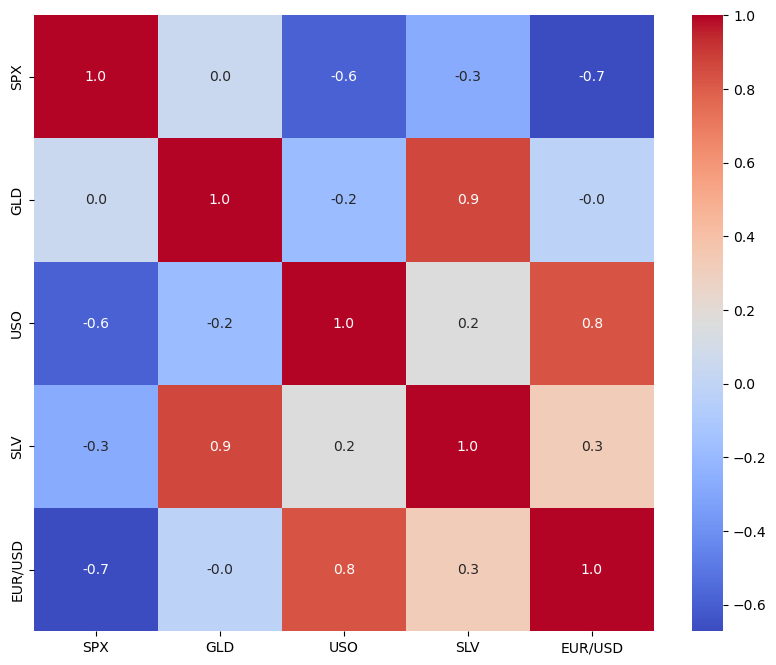

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')

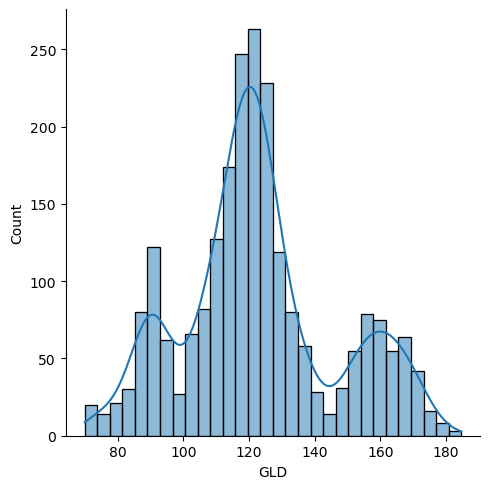

In [17]:
## Checking the distribution of the GLD prices
sns.displot(gold_data['GLD'], bins=30, kde=True)

In [18]:
## splitting the features and target variable
X = gold_data.drop(columns=['GLD']) ## as the date is already dropped
Y = gold_data['GLD']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [26]:
model = RandomForestRegressor(n_estimators = 100)

In [27]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [29]:
## predicting on train data

train_predictions = model.predict(X_train)
train_r2 = r2_score(Y_train, train_predictions)
train_mae = mean_absolute_error(Y_train, train_predictions) 
print(f'Train R2 Score: {train_r2}')
print(f'Train Mean Absolute Error: {train_mae}')

## predicting on test data

predictions = model.predict(X_test)
test_r2 = r2_score(Y_test, predictions)
test_mae = mean_absolute_error(Y_test, predictions)
print(f'Test R2 Score: {test_r2}')
print(f'Test Mean Absolute Error: {test_mae}')

Train R2 Score: 0.9984373611091293
Train Mean Absolute Error: 0.4927825237499992
Test R2 Score: 0.9892095848675928
Test Mean Absolute Error: 1.3367320045851505


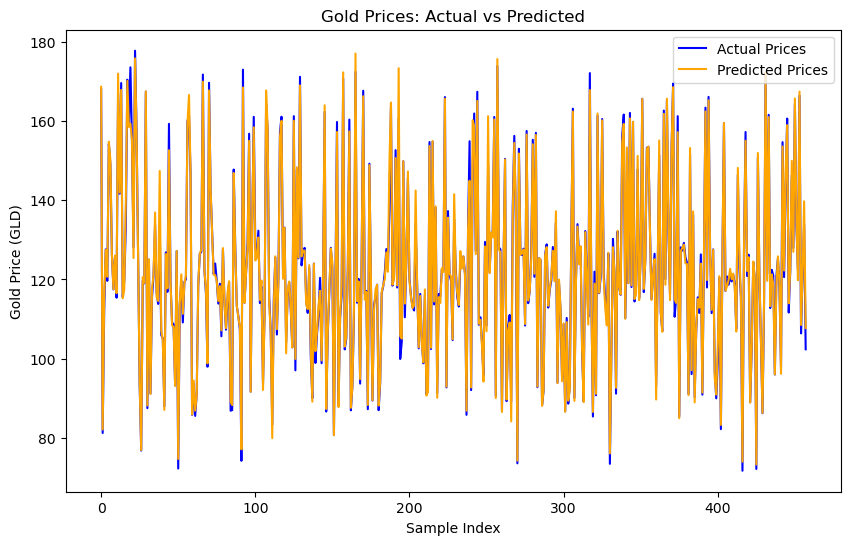

In [31]:
## plotting 
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='orange') 
plt.title('Gold Prices: Actual vs Predicted')
plt.xlabel('Sample Index')  
plt.ylabel('Gold Price (GLD)')
plt.legend()    
plt.show()